In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
path = "DataJobID-2743618_212595_2541187_Indiaredution_TRN_Exporter_View_Report.csv"

In [32]:
df = pd.read_csv(path)

In [33]:
df.head()

,Nomencode,reporter_iso_n,ReporterName,Partner_ISO_N,PartnerName,ProductCode,ExportsBefore in 1000 USD,ExportsAfter in 1000 USD,ExportChangeInRevenue in 1000 USD
0,HS,156,China,4,Afghanistan,8,44984.274,44984.274,0.0
1,HS,156,China,4,Afghanistan,80290,43602.109,43602.109,0.0
2,HS,156,China,4,Afghanistan,80420,113.527,113.527,0.0
3,HS,156,China,4,Afghanistan,80620,263.278,263.278,0.0
4,HS,156,China,4,Afghanistan,81310,1005.360,1005.360,0.0


Summary Statistics:
       ExportsBefore in 1000 USD  ExportsAfter in 1000 USD  \
count               1.305420e+05              1.305420e+05   
mean                3.970549e+04              3.973911e+04   
std                 1.048127e+06              1.048129e+06   
min                 1.000000e-03              1.000000e-03   
25%                 2.681000e+00              2.685000e+00   
50%                 5.674500e+01              5.687850e+01   
75%                 1.011491e+03              1.014396e+03   
max                 1.746350e+08              1.746342e+08   

       ExportChangeInRevenue in 1000 USD  
count                      130542.000000  
mean                           33.617260  
std                          2871.927889  
min                       -101763.277000  
25%                            -0.064000  
50%                            -0.001000  
75%                             0.000000  
max                        462627.545000  

Total Exports Before: $5,183,234,

/tmp/ipykernel_24138/1075181725.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/shankerabhigyan/miniconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


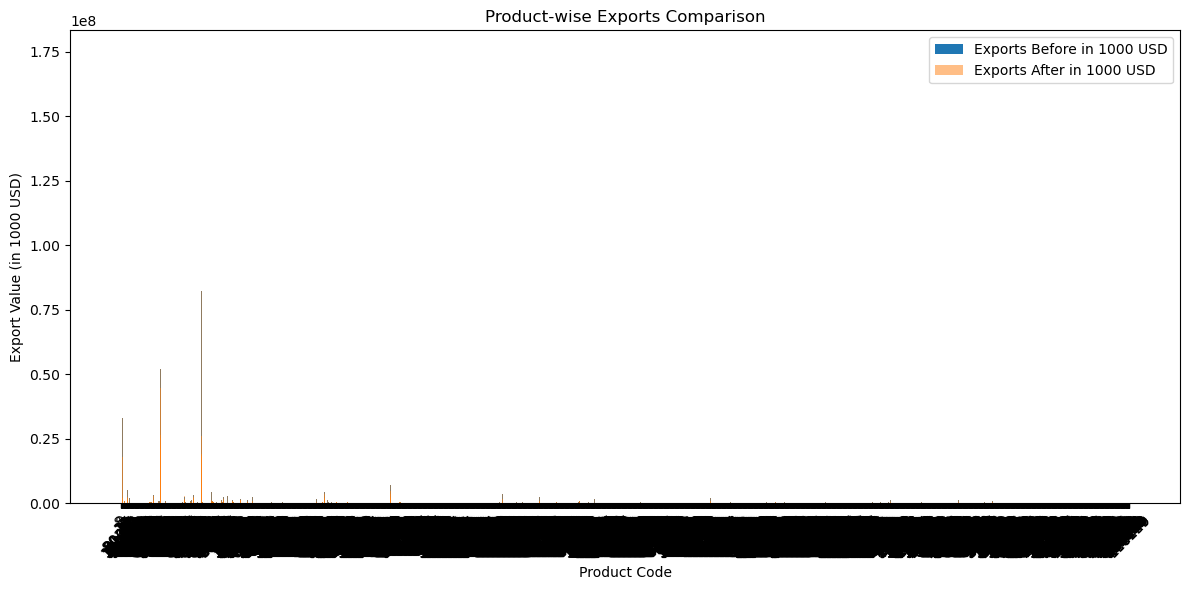


Product-wise Export Share (%):
        ProductCode  export_share
0                 8           0.0
1             80290           0.0
2             80420           0.0
3             80620           0.0
4             81310           0.0
...             ...           ...
130537           23           0.0
130538       230110           0.0
130539           25           0.0
130540       251612           0.0
130541           29           0.0

[130542 rows x 2 columns]

Additional Insights:

Top 3 Products by Export Value:
Product Code 85: $174,635,006.89
Product Code 26: $116,393,061.48
Product Code 85: $113,132,697.00

Products with Changed Export Values:
        ProductCode  ExportChangeInRevenue in 1000 USD
8                12                             -0.359
9            121190                             -0.083
10           121299                             -0.276
11               13                             -0.002
12           130190                             -0.002
...        

In [39]:
# Basic analysis functions
def analyze_trade_data(df):
    # 1. Summary statistics
    print("Summary Statistics:")
    print(df[['ExportsBefore in 1000 USD', 'ExportsAfter in 1000 USD', 'ExportChangeInRevenue in 1000 USD']].describe())
    
    # 2. Total exports before and after
    total_before = df['ExportsBefore in 1000 USD'].sum()
    total_after = df['ExportsAfter in 1000 USD'].sum()
    print(f"\nTotal Exports Before: ${total_before:,.2f}")
    print(f"Total Exports After: ${total_after:,.2f}")
    
    # 3. Product-wise analysis
    print("\nProduct-wise Export Analysis:")
    product_analysis = df.groupby('ProductCode').agg({
        'ExportsBefore in 1000 USD': 'sum',
        'ExportsAfter in 1000 USD': 'sum'
    }).round(2)
    print(product_analysis)
    
    # 4. Visualization: Product-wise exports comparison
    plt.figure(figsize=(12, 6))
    plt.bar(df['ProductCode'].astype(str), df['ExportsBefore in 1000 USD'], label='Exports Before in 1000 USD')
    plt.bar(df['ProductCode'].astype(str), df['ExportsAfter in 1000 USD'], alpha=0.5, label='Exports After in 1000 USD')
    plt.title('Product-wise Exports Comparison')
    plt.xlabel('Product Code')
    plt.ylabel('Export Value (in 1000 USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 5. Export share analysis
    df['export_share'] = (df['ExportsBefore in 1000 USD'] / df['ExportsBefore in 1000 USD'].sum()) * 100
    print("\nProduct-wise Export Share (%):")
    print(df[['ProductCode', 'export_share']].round(2))

# Run the analysis
analyze_trade_data(df)

# Additional insights function
def get_additional_insights(df):
    print("\nAdditional Insights:")
    
    # 1. Identify top products by export value
    top_products = df.nlargest(3, 'ExportsBefore in 1000 USD')
    print("\nTop 3 Products by Export Value:")
    for _, row in top_products.iterrows():
        print(f"Product Code {row['ProductCode']}: ${row['ExportsBefore in 1000 USD']:,.2f}")
    
    # 2. Check for any significant changes
    if not all(df['ExportChangeInRevenue in 1000 USD'] == 0):
        print("\nProducts with Changed Export Values:")
        changes = df[df['ExportChangeInRevenue in 1000 USD'] != 0]
        print(changes[['ProductCode', 'ExportChangeInRevenue in 1000 USD']])
    else:
        print("\nNo changes in export values observed between periods")

# Run additional insights
get_additional_insights(df)